In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import seaborn as sb

In [389]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [390]:
mydata=pd.read_csv("Clean_data.csv")

In [391]:
mydata.shape

(16623, 16)

In [393]:
#Displaying columns

In [394]:
mydata.keys()

Index(['Category', 'Desc', ' ', ' .1', ' .2', ' .3', ' .4', ' .5', ' .6',
       ' .7', ' .8', ' .9', ' .10', ' .11', ' .12', ' .13'],
      dtype='object')

In [395]:
mydata_new=mydata[["Category", "Desc"]]

In [396]:
sum(data.duplicated())

5

In [220]:
#Dropping duplicate entries

In [397]:
data.ix[mydata.duplicated(keep='first'),]

/home/samsher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [Category, Desc]
Index: []

In [222]:
#Dropping NaN entries

In [398]:
clean_data=data.dropna()

In [399]:
clean_data.isna().sum()

Category    0
Desc        0
dtype: int64

In [401]:
clean_data=clean_data.replace(["Transportation","Travel"],"Travel/Transportation")
clean_data=clean_data.replace(["Arts & Entertainment","Recreation & Hobbies"],"Arts & Entertainment")

In [402]:
cat_des=clean_data["Category"].value_counts()

In [403]:
cat_des

Health                    1198
Business & Industry       1122
Finance                   1024
Beauty & Fitness           887
Food & Drink               872
Law & Government           808
Sports                     779
Books & Literature         751
Internet & Telecom         740
Automotive                 681
Travel/Transportation      679
News & Media               670
Arts & Entertainment       656
Home & Garden              566
Autos & Vehicles           550
Reference                  543
Shopping                   540
Science                    531
Computer & Electronics     497
Career & Education         443
Pets & Animals             418
IT Company                 401
People & Society           400
Games                      359
Gambling                   295
Adult                      213
Name: Category, dtype: int64

In [228]:
#Plotting catagory graph

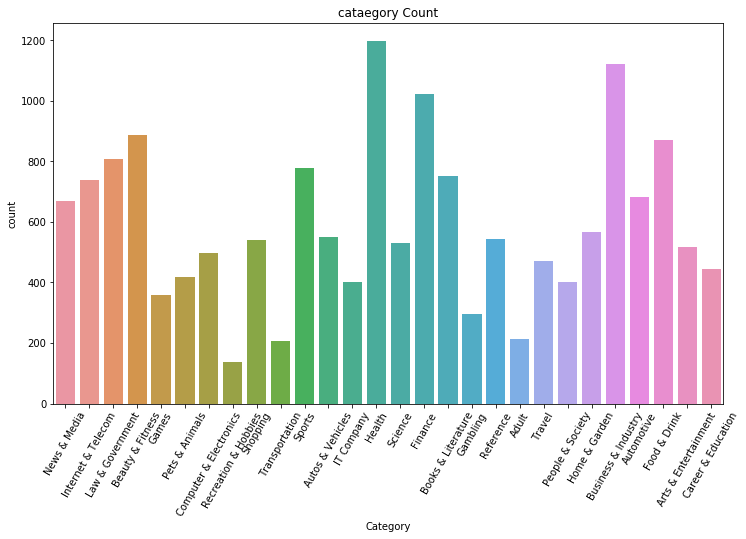

In [404]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=60)
sb.countplot("Category",data=data)
plt.title("cataegory Count")
plt.show()

In [230]:
#clean_data=clean_data.replace(["Games","Sports"],"Sports")

In [405]:
clean_data["Category"].value_counts()

Health                    1198
Business & Industry       1122
Finance                   1024
Beauty & Fitness           887
Food & Drink               872
Law & Government           808
Sports                     779
Books & Literature         751
Internet & Telecom         740
Automotive                 681
Travel/Transportation      679
News & Media               670
Arts & Entertainment       656
Home & Garden              566
Autos & Vehicles           550
Reference                  543
Shopping                   540
Science                    531
Computer & Electronics     497
Career & Education         443
Pets & Animals             418
IT Company                 401
People & Society           400
Games                      359
Gambling                   295
Adult                      213
Name: Category, dtype: int64

In [406]:
clean_data.to_csv("clean_data.csv")

In [407]:
clean_data.shape

(16623, 2)

In [408]:
new_clean_data=pd.read_csv(r"clean_data.csv")

In [409]:
cleandatanew=new_clean_data

In [410]:
cleandatanew.drop(["Unnamed: 0"],axis=1)[:2]

Category                                               Desc
0        News & Media  Trend Watch: Media: Trump 'Caved' on Shutdown ...
1  Internet & Telecom  ZYCOO is the leading developer and manufacture...

In [411]:
import pickle


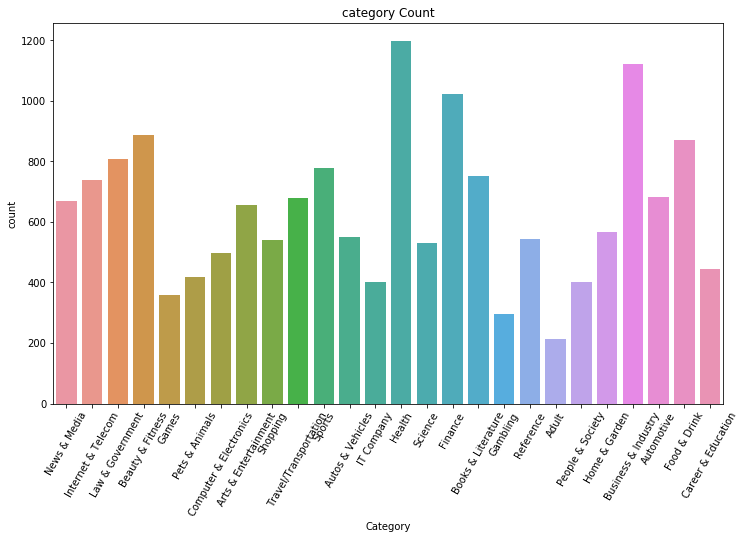

In [412]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=60)
sb.countplot("Category",data=cleandatanew)
plt.title("category Count")
plt.show()

In [239]:
#data_filtered=data_filter.drop("Unnamed: 0",axis=1)

In [414]:
#X=data["Desc"]
X=cleandatanew["Desc"]

In [415]:
X.shape

(16623,)

In [416]:
corpus = []
for i in range(0,len(X)):
    process_data = re.sub(r'\W', ' ', str(X[i]))
    process_data = process_data.lower()
    process_data= re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", process_data)
    process_data = re.sub(r"\'s", " ", process_data)
    process_data=re.sub(r'\d+'," ",process_data)
    process_data= re.sub("[^a-zA-Z]", " ",  process_data)
    process_data= re.sub(r'^br$', ' ', process_data)
    process_data = re.sub(r'\d', ' ', process_data)
    process_data= re.sub(r'\s+br\s+',' ',process_data)
    process_data = re.sub(r'\s+[a-z]\s+', ' ',process_data)
    process_data = re.sub(r'^b\s+', '', process_data)
    process_data= re.sub(r'\s+', ' ', process_data)
    corpus.append(process_data)

In [420]:
#Doing limitization or find root word.

In [421]:
all_words=[w.split() for w in corpus]
all_flat_words=[ewords for words in all_words for ewords in words]
from nltk.corpus import stopwords
all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
set_nf=set(all_flat_words_ns)

In [418]:
corpus_new=list(set_nf)
corpus_new="".join(corpus_new)

In [419]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [246]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
np.random.seed(400)

In [247]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text, pos='v')

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [248]:
print("Original document: ")
words = []
for word in corpus_new.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(corpus))

Original document: 
['compliantestimatedtattooistsfaucetscaprinosagelessfarmallblendsprincipalspotomacagilitychretienkamerelevarlicarinecumulativehospicealongsideenvironmentsharpestjaunesreklamaspringhillsympozjaabchristinebkkpayfavorstataulegitconsultancyappetizerslandolldiversifiedinnovatorgermanyprimatefarcearbetarwineriesapplikeybenchmarkejerciciosinvestorwordsfbdadeliciousfoodsurgeriesspiritscrizalbesinleritamhesaplamaearliestliftmegadrivebhajicompletelycookbookswalnutbrieferiekernanobridgemedicincdjrtrabalhosunfaircremefoldblombergsunscreennewsfeedmariamaiirocbiometricgmcocuksubgroupsnolichuckyshockingegoistegoamembranemucholottsunamisutherlandroseburgshowperceptualhoggwaylandeasingngpcuplikanboilfairspoliticpesmaricasecularcotezioncalciomercatoaugmentedvestmavridescabosindemnityhpbiodieseltogokhavarilansetemediostakihandcuffsprescribeakwariumfluoritetiresoldtimerereistemiyorsanquestionedfyresitehaikartylondonjiminjackpotimpartialitydianaexternetworksclasificadoshogunendurosmarta

TypeError: decoding to str: need a bytes-like object, list found

In [249]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/samsher/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [250]:
processed_docs = []

for doc in X:
    processed_docs.append(preprocess(doc))

In [251]:
processed_docs

[['trend',
  'watch',
  'media',
  'trump',
  'cave',
  'shutdown',
  'merriam',
  'webster'],
 ['zycoo',
  'lead',
  'developer',
  'manufacturer',
  'telephony',
  'devices',
  'relate',
  'systems',
  'devote',
  'past',
  'years',
  'powerful',
  'scalable',
  'voice',
  'voip',
  'solutions',
  'mainly',
  'serve',
  'smes',
  'market'],
 ['zwaik',
  'gilbert',
  'associate',
  'long',
  'island',
  'base',
  'immigration',
  'firm',
  'seek',
  'attorney',
  'prepare',
  'asylum',
  'applications',
  'lawyers',
  'help',
  'determine',
  'eligibility',
  'employment',
  'base',
  'green',
  'card',
  'visa',
  'work',
  'card',
  'immigrants',
  'family',
  'immigration',
  'lawyers',
  'expertise',
  'investment',
  'daca',
  'deportation'],
 ['zumba',
  'chas',
  'pelvic',
  'thrust',
  'change',
  'life',
  'report',
  'alex',
  'kuczynski',
  'alex',
  'kuczynski',
  'run',
  'tennis',
  'play',
  'athlete'],
 ['zravian',
  'world',
  'largest',
  'zravian',
  'like',
  'onli

In [252]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [253]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 cave
1 media
2 merriam
3 shutdown
4 trend
5 trump
6 watch
7 webster
8 developer
9 devices
10 devote


In [254]:
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

'\nOPTIONAL STEP\nRemove very rare and very common words:\n\n- words appearing less than 15 times\n- words appearing in more than 10% of all documents\n'

In [255]:

'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [256]:

'''
Preview BOW for our sample preprocessed document
'''
document_num = 100
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 96 ("products") appears 1 time.
Word 224 ("today") appears 1 time.
Word 423 ("broker") appears 1 time.
Word 426 ("mortgage") appears 2 time.
Word 594 ("know") appears 1 time.
Word 744 ("rat") appears 1 time.
Word 900 ("customers") appears 1 time.
Word 901 ("edmonton") appears 1 time.
Word 902 ("situation") appears 1 time.
Word 903 ("tailor") appears 1 time.
Word 904 ("touch") appears 1 time.


In [257]:
len(bow_corpus)

16623

In [258]:
len(corpus)

16623

In [259]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0,'Knn':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0,'Knn':0}
accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0,'Knn':0}

In [260]:
#accuracy_container

In [261]:
vectorizer = TfidfVectorizer(max_features = len(bow_corpus), min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
#vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [262]:
tfidf_matrix.shape

(16623, 12806)

In [263]:
with open('vectorizer.pickle','wb') as f:
    pickle.dump(vectorizer,f)

### splitting tha data

In [264]:
variables = tfidf_matrix
labels = cleandatanew.Category
x_train, x_test, y_train, y_test  =  train_test_split(variables, labels, test_size=.2)

In [265]:
with open('X.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('labels.pickle','wb') as f:
    pickle.dump(labels,f)

In [266]:
print("shape of X_train is {} shape of Y_train is {}".format(len(x_train),len(y_train)))
print("shape of X_test is {} shape of Y_test is {}".format(len(x_test),len(y_test)))

shape of X_train is 13298 shape of Y_train is 13298
shape of X_test is 3325 shape of Y_test is 3325


In [267]:
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library:
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(x_train,y_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [268]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(x_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [269]:
nb_ascore=sklearn.metrics.accuracy_score(y_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [270]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.428571
Training Time: 1.385397
Prediction Time: 0.420524


In [271]:
accuracy_container

{'b_naive_bayes': 0.42857142857142855,
 'mn_naive_bayes': 0,
 'random_forest': 0,
 'linear_svm': 0,
 'Knn': 0}

In [272]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
myconfusion_matrix_ber = pd.crosstab(y_test,bnb_predictions, rownames=['Actual'], colnames=['Predicted'], margins = True)
myconfusion_matrix_ber

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


Predicted               Adult  Arts & Entertainment  Automotive  \
Actual                                                            
Adult                       0                     1           0   
Arts & Entertainment        0                    23           0   
Automotive                  0                     0          83   
Autos & Vehicles            0                     0          27   
Beauty & Fitness            0                     0           0   
Books & Literature          1                     0           0   
Business & Industry         2                     0           3   
Career & Education          0                     0           0   
Computer & Electronics      0                     0           0   
Finance                     0                     0           2   
Food & Drink                0                     0           0   
Gambling                    0                     1           0   
Games                       0                     2           0   
Health                      1                     0           1   
Home & Garden               1                     0           4   
IT Company                  0                     0           0   
Internet & Telecom          0                     1           0   
Law & Government            1                     0           0   
News & Media                0                     0           0   
People & Society            1                     0           0   
Pets & Animals              0                     1           0   
Reference                   0                     3           0   
Science                     1                     0           0   
Shopping                    0                     1           0   
Sports                      0                     0           1   
Travel/Transportation       0                     1           6   
All                         8                    34         127   

Predicted               Autos & Vehicles  Beauty & Fitness  \
Actual                                                       
Adult                                  0                 1   
Arts & Entertainment                   1                 3   
Automotive                             1                 0   
Autos & Vehicles                      20                 0   
Beauty & Fitness                       1               101   
Books & Literature                     0                 1   
Business & Industry                    0                 1   
Career & Education                     0                 3   
Computer & Electronics                 0                 2   
Finance                                0                 0   
Food & Drink                           0                 0   
Gambling                               0                 0   
Games                                  0                 1   
Health                                 0                 1   
Home & Garden                          0                 2   
IT Company                             0                 0   
Internet & Telecom                     3                 1   
Law & Government                       0                 1   
News & Media                           0                 2   
People & Society                       0                 3   
Pets & Animals                         0                 2   
Reference                              0                 1   
Science                                0                 0   
Shopping                               0                 4   
Sports                                 0                 4   
Travel/Transportation                  0                 1   
All                                   26               135   

Predicted               Books & Literature  Business & Industry  \
Actual                                                            
Adult                                   10                    6   
Arts & Entertainment                    11              

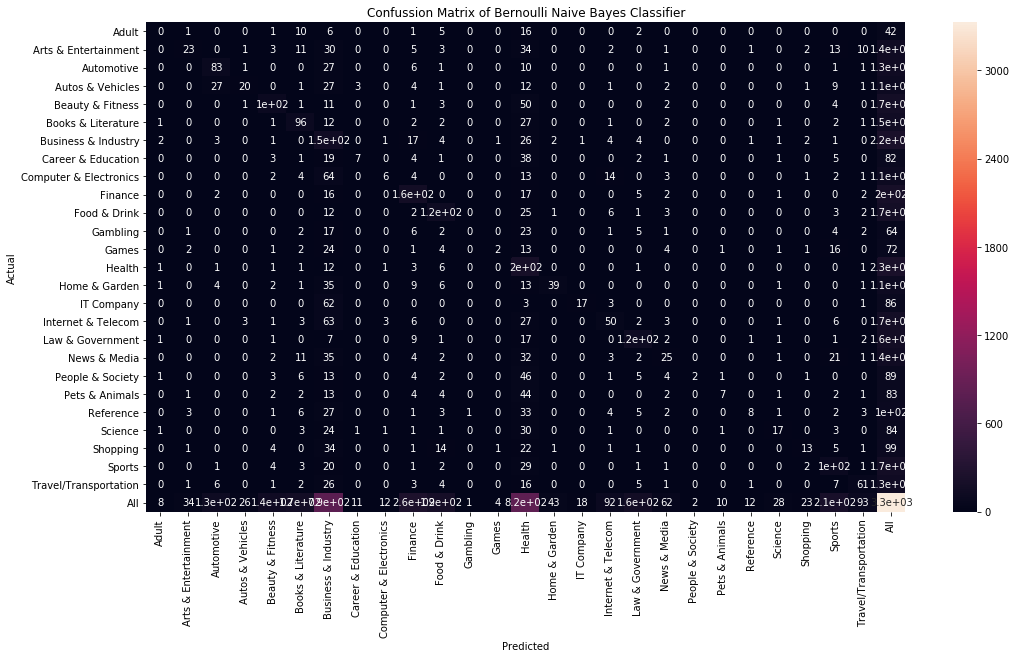

In [273]:
plt.figure(figsize=(17,9))
sb.heatmap(myconfusion_matrix_ber,annot=True)
plt.title("Confussion Matrix of Bernoulli Naive Bayes Classifier")
plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/bernoulli_confussion.png')
plt.show()

In [274]:
print("Classification Metrics: ")
cr_ber=sklearn.metrics.classification_report(y_test,bnb_predictions)
print(cr_ber)

Classification Metrics: 
                        precision    recall  f1-score   support

                 Adult       0.00      0.00      0.00        42
  Arts & Entertainment       0.68      0.17      0.27       139
            Automotive       0.65      0.63      0.64       131
      Autos & Vehicles       0.77      0.18      0.30       109
      Beauty & Fitness       0.75      0.58      0.65       174
    Books & Literature       0.58      0.65      0.61       148
   Business & Industry       0.19      0.68      0.30       221
    Career & Education       0.64      0.09      0.15        82
Computer & Electronics       0.50      0.05      0.10       114
               Finance       0.62      0.78      0.69       204
          Food & Drink       0.63      0.68      0.65       174
              Gambling       0.00      0.00      0.00        64
                 Games       0.50      0.03      0.05        72
                Health       0.25      0.88      0.39       230
         Home 

In [275]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(x_train,y_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(x_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(y_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [276]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
#and its training and prediction time are:
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.555789
Training Time: 0.498681s
Prediction Time: 0.079355s


In [277]:
accuracy_container

{'b_naive_bayes': 0.42857142857142855,
 'mn_naive_bayes': 0.5557894736842105,
 'random_forest': 0,
 'linear_svm': 0,
 'Knn': 0}

In [278]:
print("Confusion Matrix of Muti-nomiaal Naive Bayes Classifier output: ")
myconfusion_matrix_mn = pd.crosstab(y_test,prediction_mn, rownames=['Actual'], colnames=['Predicted'], margins = True)
myconfusion_matrix_mn

Confusion Matrix of Muti-nomiaal Naive Bayes Classifier output: 


Predicted               Adult  Arts & Entertainment  Automotive  \
Actual                                                            
Adult                       3                     3           0   
Arts & Entertainment        0                    34           1   
Automotive                  0                     0          95   
Autos & Vehicles            0                     0          23   
Beauty & Fitness            0                     0           0   
Books & Literature          0                     0           0   
Business & Industry         0                     0           4   
Career & Education          0                     0           0   
Computer & Electronics      0                     0           0   
Finance                     0                     0           2   
Food & Drink                0                     0           0   
Gambling                    0                     3           0   
Games                       0                     1           1   
Health                      0                     0           0   
Home & Garden               0                     0           5   
IT Company                  0                     0           0   
Internet & Telecom          0                     1           1   
Law & Government            0                     0           1   
News & Media                0                     1           0   
People & Society            0                     2           0   
Pets & Animals              0                     2           0   
Reference                   0                     2           0   
Science                     0                     0           0   
Shopping                    0                     2           0   
Sports                      0                     0           1   
Travel/Transportation       0                     1           8   
All                         3                    52         142   

Predicted               Autos & Vehicles  Beauty & Fitness  \
Actual                                                       
Adult                                  0                 1   
Arts & Entertainment                   1                 4   
Automotive                             4                 0   
Autos & Vehicles                      40                 0   
Beauty & Fitness                       1               118   
Books & Literature                     0                 0   
Business & Industry                    1                 2   
Career & Education                     0                 4   
Computer & Electronics                 0                 2   
Finance                                0                 0   
Food & Drink                           0                 0   
Gambling                               0                 1   
Games                                  0                 3   
Health                                 0                 1   
Home & Garden                          0                 1   
IT Company                             0                 0   
Internet & Telecom                     4                 3   
Law & Government                       0                 0   
News & Media                           0                 3   
People & Society                       0                 3   
Pets & Animals                         0                 3   
Reference                              1                 1   
Science                                0                 0   
Shopping                               0                 8   
Sports                                 3                 4   
Travel/Transportation                  0                 2   
All                                   55               164   

Predicted               Books & Literature  Business & Industry  \
Actual                                                            
Adult                                    7                    5   
Arts & Entertainment                     7              

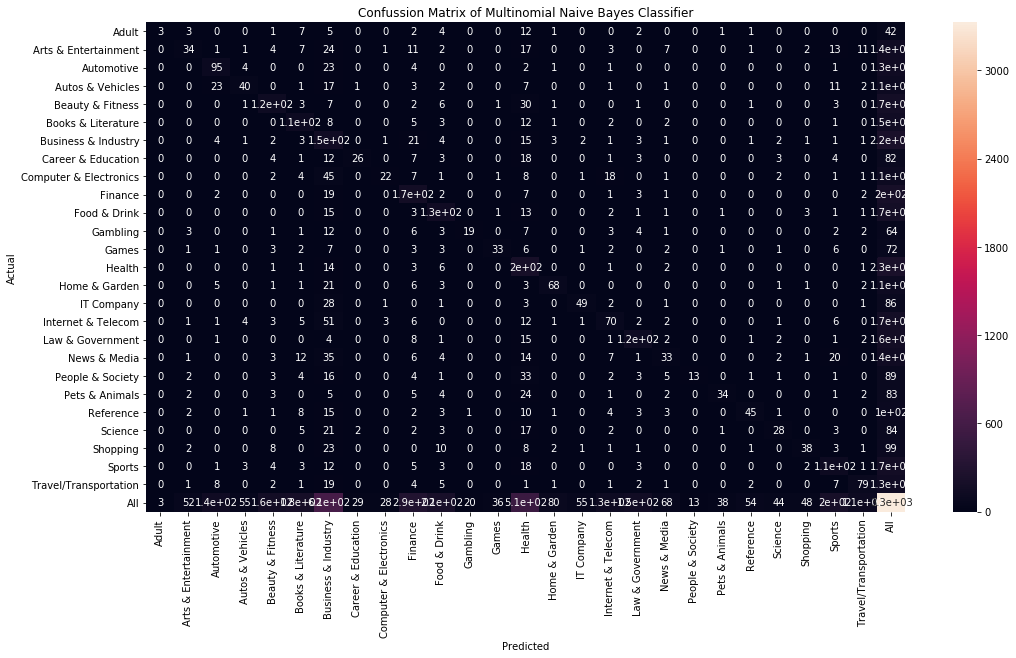

In [279]:
plt.figure(figsize=(17,9))
sb.heatmap(myconfusion_matrix_mn,annot=True)
plt.title("Confussion Matrix of Multinomial Naive Bayes Classifier")
plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/multinomial_confussion.png')
plt.show()

In [280]:
print("Classification Metrics: ")
cr_mn=sklearn.metrics.classification_report(y_test,prediction_mn)
print(cr_mn)

Classification Metrics: 
                        precision    recall  f1-score   support

                 Adult       1.00      0.07      0.13        42
  Arts & Entertainment       0.65      0.24      0.36       139
            Automotive       0.67      0.73      0.70       131
      Autos & Vehicles       0.73      0.37      0.49       109
      Beauty & Fitness       0.72      0.68      0.70       174
    Books & Literature       0.62      0.77      0.69       148
   Business & Industry       0.25      0.70      0.37       221
    Career & Education       0.90      0.32      0.47        82
Computer & Electronics       0.79      0.19      0.31       114
               Finance       0.57      0.82      0.67       204
          Food & Drink       0.63      0.76      0.69       174
              Gambling       0.95      0.30      0.45        64
                 Games       0.92      0.46      0.61        72
                Health       0.39      0.87      0.54       230
         Home 

In [281]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=20)
t0=time()
rf_classifier=rf_classifier.fit(x_train,y_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(x_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

Training Time: 107.313763s
Prediction Time: 0.270020s


In [284]:
accuracy_container['random_forest']=sklearn.metrics.accuracy_score(y_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])

Accuracy Score of Random Forests Classifier: 
0.5849624060150376


In [285]:
accuracy_container

{'b_naive_bayes': 0.42857142857142855,
 'mn_naive_bayes': 0.5557894736842105,
 'random_forest': 0.5849624060150376,
 'linear_svm': 0,
 'Knn': 0}

In [286]:
print("Confusion Matrix of Random-Forest Classifier output: ")
myconfusion_matrix_rf = pd.crosstab(y_test,rf_predictions, rownames=['Actual'], colnames=['Predicted'], margins = True)
myconfusion_matrix_rf

Confusion Matrix of Random-Forest Classifier output: 


Predicted               Adult  Arts & Entertainment  Automotive  \
Actual                                                            
Adult                      27                     2           0   
Arts & Entertainment        0                    48           2   
Automotive                  0                     0          99   
Autos & Vehicles            0                     1          26   
Beauty & Fitness            0                     3           0   
Books & Literature          0                     2           1   
Business & Industry         0                     4          10   
Career & Education          0                     3           0   
Computer & Electronics      0                     0           2   
Finance                     0                     1           5   
Food & Drink                0                     1           0   
Gambling                    0                     1           0   
Games                       0                     0           0   
Health                      1                     1           2   
Home & Garden               0                     2           6   
IT Company                  0                     0           0   
Internet & Telecom          0                     3           6   
Law & Government            0                     1           2   
News & Media                0                     8           0   
People & Society            0                     1           1   
Pets & Animals              0                     1           0   
Reference                   0                     2           0   
Science                     0                     1           0   
Shopping                    0                     8           3   
Sports                      0                     3           4   
Travel/Transportation       0                     4          11   
All                        28                   101         180   

Predicted               Autos & Vehicles  Beauty & Fitness  \
Actual                                                       
Adult                                  0                 1   
Arts & Entertainment                   2                 5   
Automotive                            12                 0   
Autos & Vehicles                      42                 0   
Beauty & Fitness                       3               108   
Books & Literature                     1                 2   
Business & Industry                    1                 3   
Career & Education                     0                 7   
Computer & Electronics                 1                 3   
Finance                                1                 2   
Food & Drink                           0                 0   
Gambling                               0                 0   
Games                                  0                 2   
Health                                 0                 5   
Home & Garden                          2                 4   
IT Company                             0                 2   
Internet & Telecom                     4                 1   
Law & Government                       1                 0   
News & Media                           3                 3   
People & Society                       1                 2   
Pets & Animals                         0                 1   
Reference                              2                 0   
Science                                1                 1   
Shopping                               0                 3   
Sports                                 1                 6   
Travel/Transportation                  2                 3   
All                                   80               164   

Predicted               Books & Literature  Business & Industry  \
Actual                                                            
Adult                                    4                    0   
Arts & Entertainment                    12              

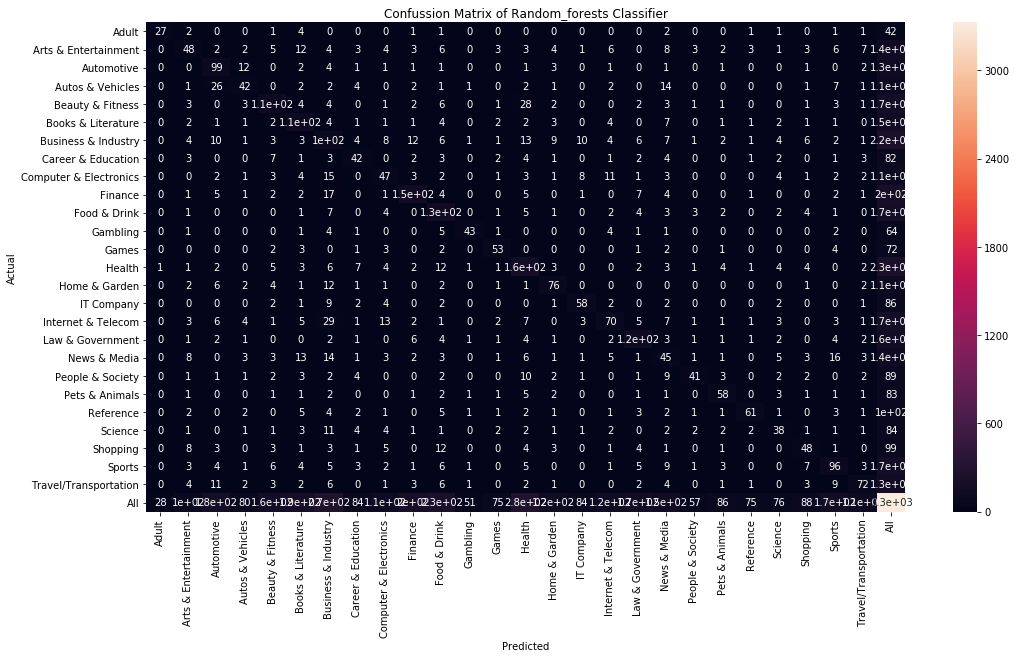

In [287]:
plt.figure(figsize=(17,9))
sb.heatmap(myconfusion_matrix_rf,annot=True)
plt.title("Confussion Matrix of Random_forests Classifier")
plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/randomforest_confussion.png')
plt.show()

In [335]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables,labels)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(x_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

Training Time: 83.947852s
Prediction Time: 0.076977s


In [339]:
with open('svm_classifier.pickle','wb') as f:
    pickle.dump(svm_classifier,f)
with open('svm_predictions.pickle','wb') as f:
    pickle.dump(svm_predictions,f)

In [340]:
accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(y_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])

Accuracy Score of Linear SVM Classifier: 0.870677


In [341]:
accuracy_container

{'b_naive_bayes': 0.42857142857142855,
 'mn_naive_bayes': 0.5557894736842105,
 'random_forest': 0.5849624060150376,
 'linear_svm': 0.8706766917293233,
 'Knn': 0.16781954887218045}

In [342]:
print("Confusion Matrix of Liner_SVM Classifier output: ")
myconfusion_matrix_linersvm = pd.crosstab(y_test,svm_predictions, rownames=['Actual'], colnames=['Predicted'], margins = True)
myconfusion_matrix_linersvm

Confusion Matrix of Liner_SVM Classifier output: 


Predicted               Adult  Arts & Entertainment  Automotive  \
Actual                                                            
Adult                      35                     0           0   
Arts & Entertainment        0                   114           0   
Automotive                  0                     0         120   
Autos & Vehicles            0                     0           9   
Beauty & Fitness            0                     0           2   
Books & Literature          1                     0           0   
Business & Industry         0                     0           4   
Career & Education          0                     0           0   
Computer & Electronics      0                     0           0   
Finance                     0                     0           2   
Food & Drink                0                     0           0   
Gambling                    0                     0           0   
Games                       0                     0           0   
Health                      0                     2           0   
Home & Garden               0                     0           1   
IT Company                  0                     0           0   
Internet & Telecom          0                     0           0   
Law & Government            0                     0           0   
News & Media                0                     1           1   
People & Society            0                     1           2   
Pets & Animals              0                     0           0   
Reference                   0                     0           0   
Science                     0                     0           0   
Shopping                    0                     2           0   
Sports                      0                     0           1   
Travel/Transportation       0                     0           5   
All                        36                   120         147   

Predicted               Autos & Vehicles  Beauty & Fitness  \
Actual                                                       
Adult                                  0                 1   
Arts & Entertainment                   0                 1   
Automotive                             7                 1   
Autos & Vehicles                      91                 2   
Beauty & Fitness                       1               153   
Books & Literature                     0                 0   
Business & Industry                    1                 1   
Career & Education                     0                 2   
Computer & Electronics                 0                 2   
Finance                                0                 1   
Food & Drink                           0                 2   
Gambling                               0                 0   
Games                                  0                 0   
Health                                 0                 4   
Home & Garden                          0                 0   
IT Company                             0                 0   
Internet & Telecom                     0                 2   
Law & Government                       0                 0   
News & Media                           0                 2   
People & Society                       0                 2   
Pets & Animals                         0                 0   
Reference                              0                 0   
Science                                0                 0   
Shopping                               1                 0   
Sports                                 3                 2   
Travel/Transportation                  0                 1   
All                                  104               179   

Predicted               Books & Literature  Business & Industry  \
Actual                                                            
Adult                                    3                    0   
Arts & Entertainment                     5              

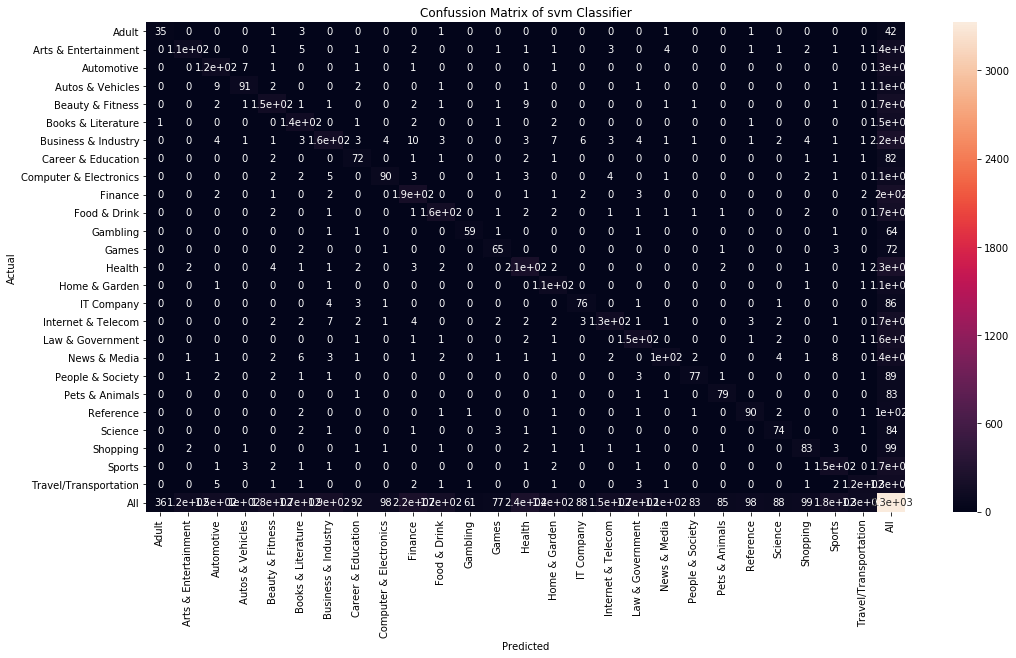

In [343]:
plt.figure(figsize=(17,9))
sb.heatmap(myconfusion_matrix_linersvm,annot=True)
plt.title("Confussion Matrix of svm Classifier")
plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/svm_confussion.png')
plt.show()

In [344]:
myconfusion_matrix_linersvm.to_csv("mylinear_svm.csv")

In [345]:
print("Classification Metrics: ")
cr_svm=sklearn.metrics.classification_report(y_test,svm_predictions)
print(cr_svm)

Classification Metrics: 
                        precision    recall  f1-score   support

                 Adult       0.97      0.83      0.90        42
  Arts & Entertainment       0.95      0.82      0.88       139
            Automotive       0.82      0.92      0.86       131
      Autos & Vehicles       0.88      0.83      0.85       109
      Beauty & Fitness       0.85      0.88      0.87       174
    Books & Literature       0.81      0.95      0.88       148
   Business & Industry       0.84      0.71      0.77       221
    Career & Education       0.78      0.88      0.83        82
Computer & Electronics       0.92      0.79      0.85       114
               Finance       0.85      0.93      0.89       204
          Food & Drink       0.91      0.91      0.91       174
              Gambling       0.97      0.92      0.94        64
                 Games       0.84      0.90      0.87        72
                Health       0.87      0.91      0.89       230
         Home 

In [346]:
cat_level=np.array([["Adult","Arts & Entertainment","Automotive","Beauty & Fitness","Books","Books & Literature","Business & Industry","Career","Career & Education","Computer & Electronics","Finance","Food & Drink","Gambling","Games","Health","Home & Garden","IT Company","Internet & Telecom","Law & Government","News & Media","People & Society","Pets & Animals","Reference","Science","Shopping","Sports","Transportation","Travel"],[0.64,0.77,0.86,0.60,0.78,0.86,0.55,0.32,0.72,0.89,0.87,0.68,0.89,0.79,0.78,0.8,0.78,0.75,0.8,0.69,0.83,
0.86,0.77,0.65,0.76,0.75,0.78,0.85]])

In [347]:
pridiction_catwise=pd.DataFrame({"Score":[0.64,0.77,0.86,0.60,0.78,0.86,0.55,0.32,0.72,0.89,0.87,0.68,0.89,0.79,0.78,0.8,0.78,0.75,0.8,0.69,0.83,
0.86,0.77,0.65,0.76,0.75,0.78,0.85]},index=["Adult","Arts & Entertainment","Automotive","Beauty & Fitness","Books","Books & Literature","Business & Industry","Career","Career & Education","Computer & Electronics","Finance","Food & Drink","Gambling","Games","Health","Home & Garden","IT Company","Internet & Telecom","Law & Government","News & Media","People & Society","Pets & Animals","Reference","Science","Shopping","Sports","Transportation","Travel"])

In [348]:
pridiction_catwise

Score
Adult                    0.64
Arts & Entertainment     0.77
Automotive               0.86
Beauty & Fitness         0.60
Books                    0.78
Books & Literature       0.86
Business & Industry      0.55
Career                   0.32
Career & Education       0.72
Computer & Electronics   0.89
Finance                  0.87
Food & Drink             0.68
Gambling                 0.89
Games                    0.79
Health                   0.78
Home & Garden            0.80
IT Company               0.78
Internet & Telecom       0.75
Law & Government         0.80
News & Media             0.69
People & Society         0.83
Pets & Animals           0.86
Reference                0.77
Science                  0.65
Shopping                 0.76
Sports                   0.75
Transportation           0.78
Travel                   0.85

In [349]:
p="IT Company"

In [350]:
PP=pridiction_catwise.loc[p]
res=list(PP.values)
str(res)

'[0.78]'

In [351]:
dict_result_percentage={}

In [352]:
%matplotlib inline
import matplotlib.pyplot as plt

In [353]:
print(training_time_container)
print(prediction_time_container)

{'b_naive_bayes': 1.3853974342346191, 'mn_naive_bayes': 0.49868083000183105, 'random_forest': 107.31376338005066, 'linear_svm': 83.94785237312317, 'Knn': 12.923831939697266}
{'b_naive_bayes': 0.42052412033081055, 'mn_naive_bayes': 0.07935476303100586, 'random_forest': 0.27001953125, 'linear_svm': 0.07697653770446777, 'Knn': 992.9621369838715}


In [354]:
from sklearn.neighbors import KNeighborsClassifier


In [355]:
knn_model=KNeighborsClassifier(n_neighbors=5)
t0=time()
knn_classifier=knn_model.fit(x_train,y_train)
training_time_container['Knn']=time()-t0
print("Training Time: %fs"%training_time_container['Knn'])
t0=time()
knn_predictions=knn_classifier.predict(x_test)
prediction_time_container['Knn']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['Knn'])

Training Time: 13.233546s
Prediction Time: 787.991467s


In [367]:
accuracy_container['Knn']=sklearn.metrics.accuracy_score(y_test, knn_predictions)
print ("Accuracy Score of Knn Classifier: %f"%accuracy_container['Knn'])

Accuracy Score of Knn Classifier: 0.167820


In [368]:
accuracy_container

{'b_naive_bayes': 0.42857142857142855,
 'mn_naive_bayes': 0.5557894736842105,
 'random_forest': 0.5849624060150376,
 'linear_svm': 0.8706766917293233,
 'Knn': 0.16781954887218045}

In [369]:
print("Confusion Matrix of Knn Classifier output: ")
myconfusion_matrix_knn = pd.crosstab(y_test,knn_predictions, rownames=['Actual'], colnames=['Predicted'], margins = True)
myconfusion_matrix_knn

Confusion Matrix of Knn Classifier output: 


Predicted               Adult  Arts & Entertainment  Automotive  \
Actual                                                            
Adult                       8                    13           2   
Arts & Entertainment        0                    48          11   
Automotive                  0                    23          38   
Autos & Vehicles            0                    26          15   
Beauty & Fitness            0                    32           9   
Books & Literature          1                    27          10   
Business & Industry         0                    46          21   
Career & Education          0                    25           4   
Computer & Electronics      0                    27           7   
Finance                     0                    37          11   
Food & Drink                0                    46          11   
Gambling                    0                    14           8   
Games                       0                    23           9   
Health                      0                    42          24   
Home & Garden               0                    15           7   
IT Company                  0                    15           5   
Internet & Telecom          0                    48          13   
Law & Government            0                    34          13   
News & Media                0                    22          17   
People & Society            0                    21           3   
Pets & Animals              0                    26           6   
Reference                   0                    18           9   
Science                     0                    29           4   
Shopping                    0                    24           9   
Sports                      0                    33          10   
Travel/Transportation       0                    25          14   
All                         9                   739         290   

Predicted               Autos & Vehicles  Beauty & Fitness  \
Actual                                                       
Adult                                  0                 3   
Arts & Entertainment                   0                 8   
Automotive                             3                 4   
Autos & Vehicles                      13                 4   
Beauty & Fitness                       0                54   
Books & Literature                     0                14   
Business & Industry                    0                27   
Career & Education                     0                 6   
Computer & Electronics                 0                18   
Finance                                0                12   
Food & Drink                           0                17   
Gambling                               0                 8   
Games                                  0                 2   
Health                                 0                25   
Home & Garden                          0                10   
IT Company                             0                 2   
Internet & Telecom                     0                17   
Law & Government                       2                11   
News & Media                           0                18   
People & Society                       0                 8   
Pets & Animals                         0                 5   
Reference                              0                14   
Science                                0                10   
Shopping                               1                13   
Sports                                 2                13   
Travel/Transportation                  0                13   
All                                   21               336   

Predicted               Books & Literature  Business & Industry  \
Actual                                                            
Adult                                    0                    2   
Arts & Entertainment                     2              

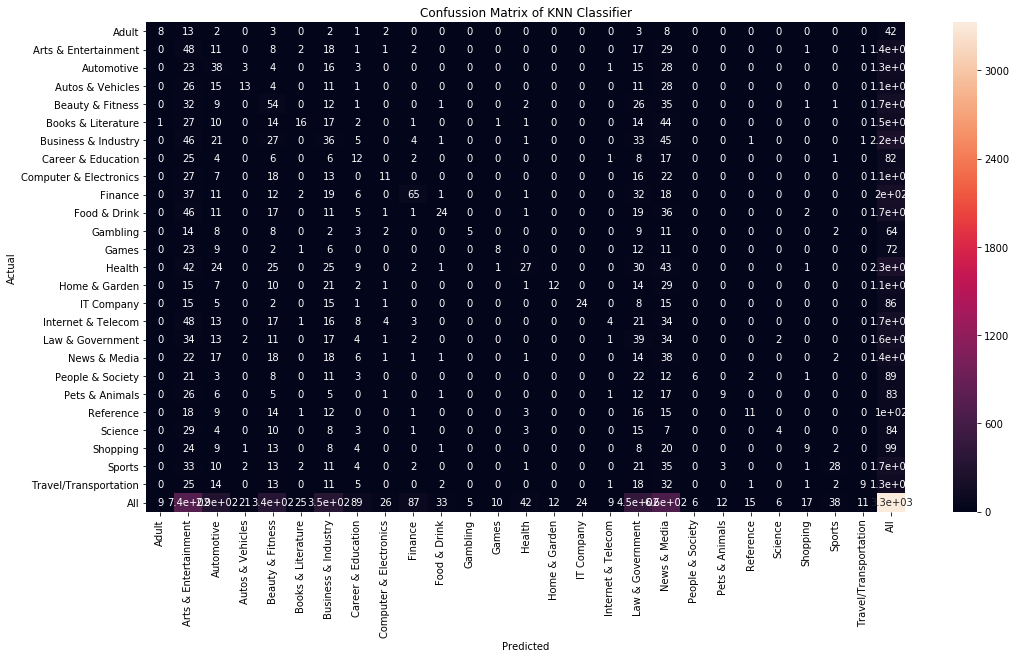

In [370]:
plt.figure(figsize=(17,9))
sb.heatmap(myconfusion_matrix_knn,annot=True)
plt.title("Confussion Matrix of KNN Classifier")
plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/knn_confussion.png')
plt.show()

In [371]:
training_time=list(training_time_container.values())
algo=list(training_time_container.keys())
prediction_time=list(prediction_time_container.values())
algo_accuracy=list(accuracy_container.values())

In [372]:
algo_accuracy

[0.42857142857142855,
 0.5557894736842105,
 0.5849624060150376,
 0.8706766917293233,
 0.16781954887218045]

In [373]:
result=pd.DataFrame({"Algo":algo,"Training_time":training_time,"Prediction_time":prediction_time,"Accuracy":algo_accuracy})
result

Algo  Training_time  Prediction_time  Accuracy
0   b_naive_bayes       1.385397         0.420524  0.428571
1  mn_naive_bayes       0.498681         0.079355  0.555789
2   random_forest     107.313763         0.270020  0.584962
3      linear_svm      83.947852         0.076977  0.870677
4             Knn      13.233546       787.991467  0.167820

In [374]:
scvp=result.iloc[3,:]
print(scvp)

Algo               linear_svm
Training_time         83.9479
Prediction_time     0.0769765
Accuracy             0.870677
Name: 3, dtype: object


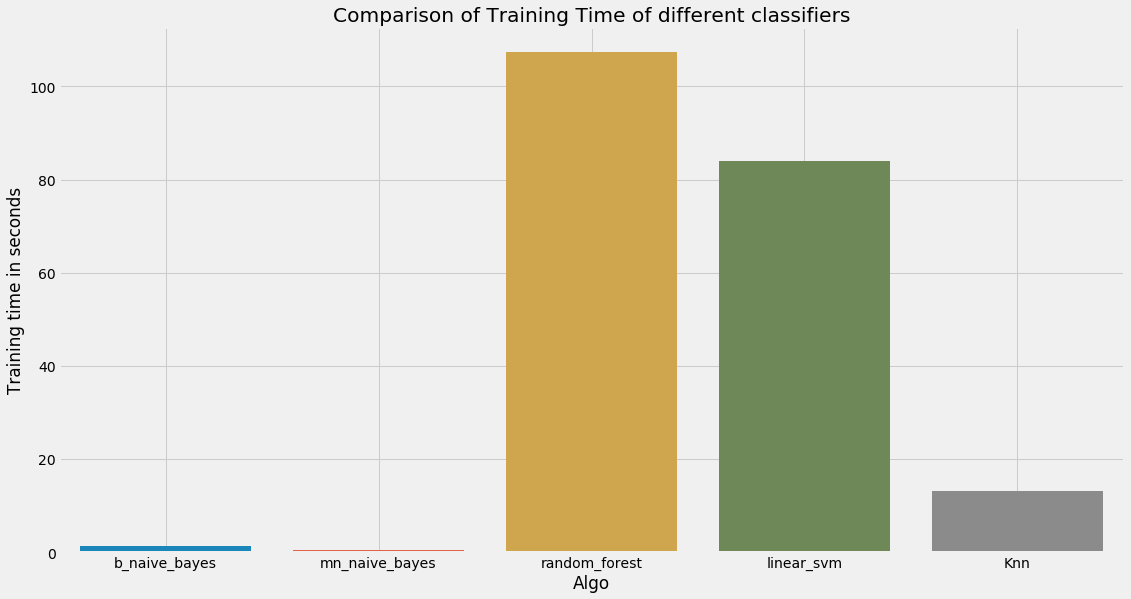

In [375]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(17,9))
    sb.barplot("Algo","Training_time",data=result)
    plt.ylabel("Training time in seconds")
    #plt.ylim(0,11)
    plt.grid(True)
    plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/training_time.png')
    plt.title("Comparison of Training Time of different classifiers")

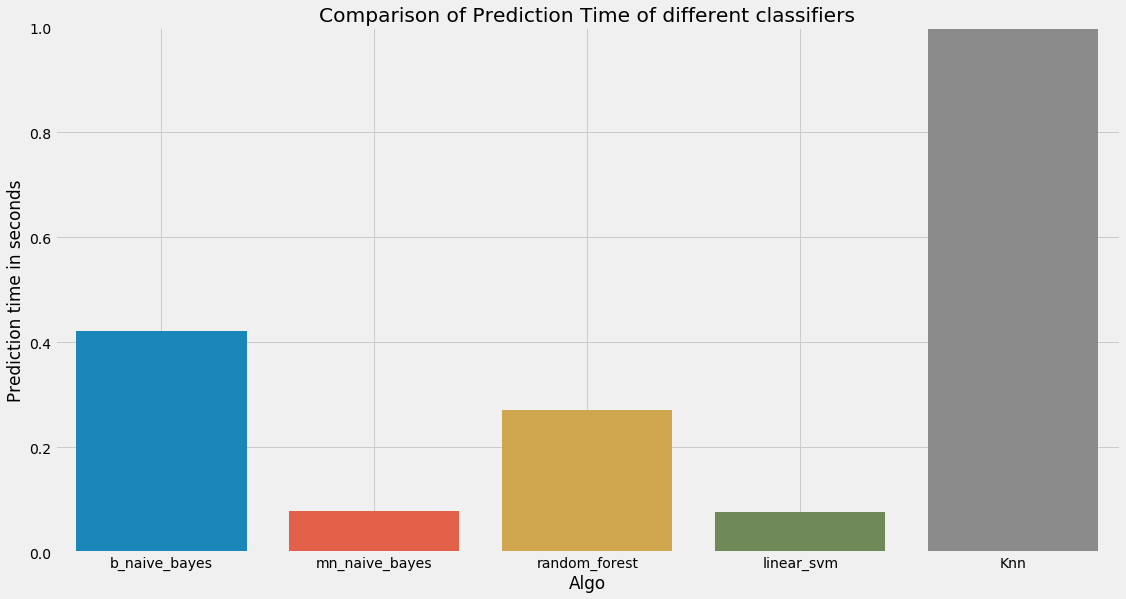

In [376]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(17,9))
    sb.barplot("Algo","Prediction_time",data=result)
    plt.ylabel("Prediction time in seconds")
    plt.grid(True)
    plt.ylim(0,1)
    plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/prediction_time.png')
    plt.title("Comparison of Prediction Time of different classifiers")

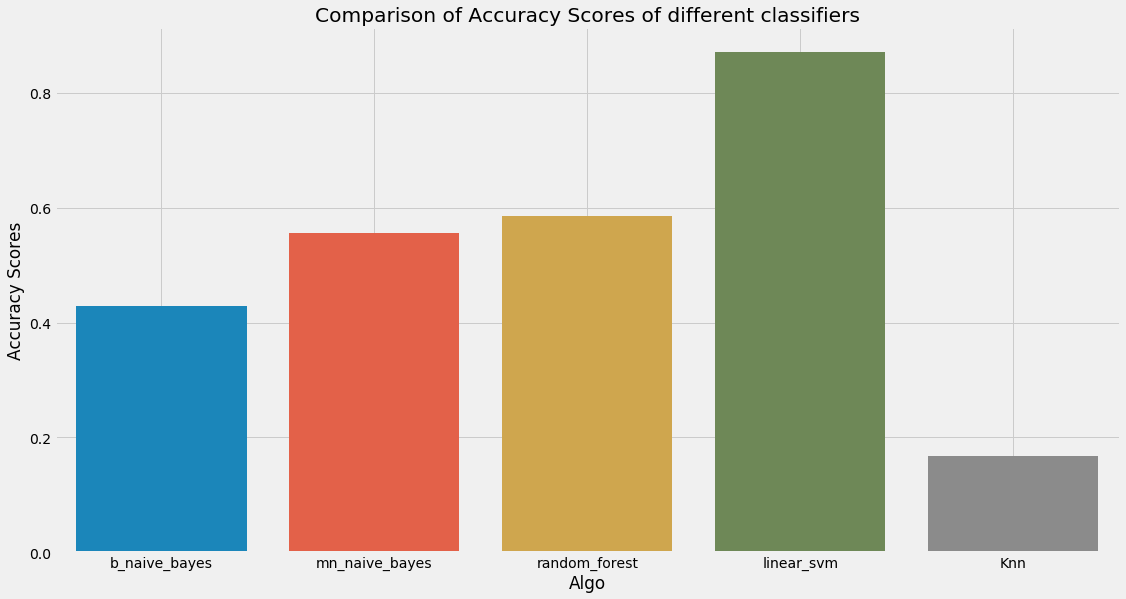

In [377]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(17,9))
    sb.barplot("Algo","Accuracy",data=result)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/accuracy.png')
    plt.title("Comparison of Accuracy Scores of different classifiers")

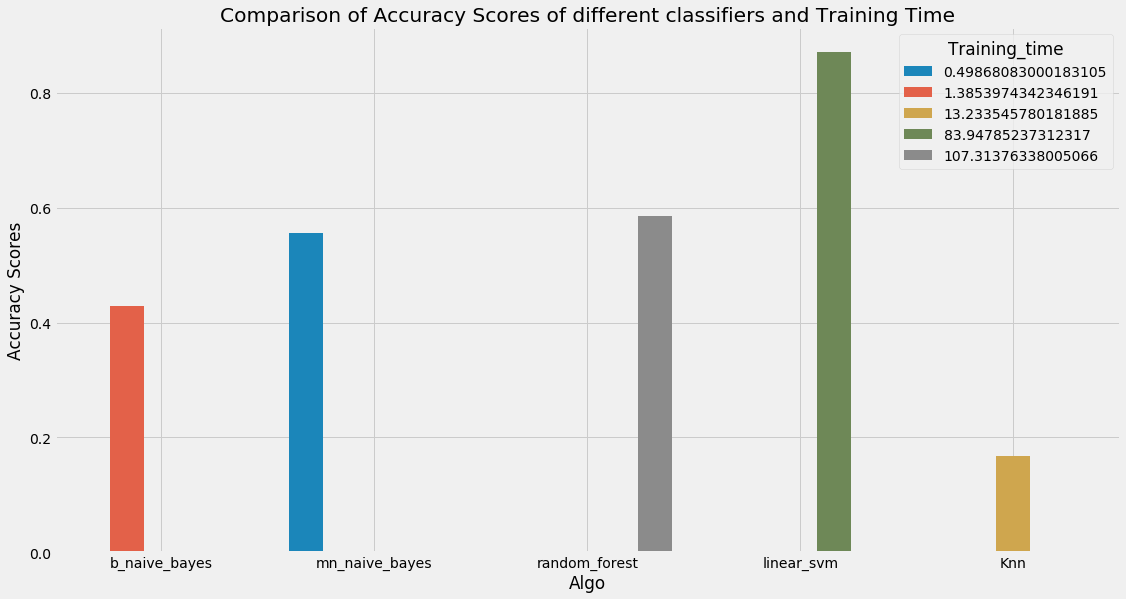

In [378]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(17,9))
    sb.barplot("Algo","Accuracy",data=result,hue="Training_time")
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/accuracy_trainingtime.png')
    plt.title("Comparison of Accuracy Scores of different classifiers and Training Time")

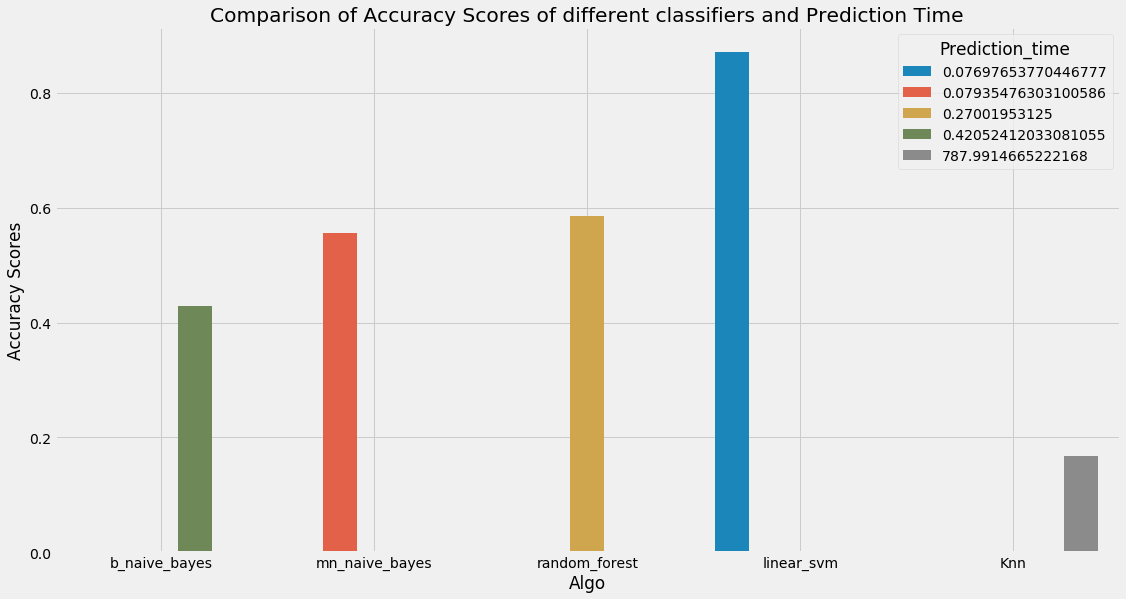

In [379]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(17,9))
    sb.barplot("Algo","Accuracy",data=result,hue="Prediction_time")
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.savefig(r'/home/samsher/Desktop/MyFlask1/static/images/accuracy_predictiontime.png')
    plt.title("Comparison of Accuracy Scores of different classifiers and Prediction Time")

In [380]:
scvp

Algo               linear_svm
Training_time         83.9479
Prediction_time     0.0769765
Accuracy             0.870677
Name: 3, dtype: object

In [381]:
xa=["Training_time in Seconds","Prediction_time_second","Accuracy in Percentage"]
ya=["8.85347","0.0108445","0.726675"]


In [382]:
table=pd.DataFrame({"Name":xa,"Value":ya})
table

Name      Value
0  Training_time in Seconds    8.85347
1    Prediction_time_second  0.0108445
2    Accuracy in Percentage   0.726675

## Key_words for decision Building

In [383]:
#Predict the result by using direct metedata

In [384]:
doc=["Examines the science and arguments of global warming skepticism. Common objections like 'global warming is caused by the sun', 'temperature has changed naturally in the past' or 'other planets are warming too' are examined to see what the science really says."]

In [385]:
vec=vectorizer.transform(doc)

In [386]:
s=svm_classifier.predict(vec)

In [387]:
print("my predicted category is {}".format(s))

my predicted category is ['Science']
